# Subtype prediction on the GSE56600 DNAm dataset from 227 pediatric B-cell ALL samples ([Lee et al., 2015](https://doi.org/10.1093/nar/gkv103))

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
import seaborn as sns
import joblib
import sys
sys.path.append('../Train_Predict_modules/')
from NSCmodelsV2 import *
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
path = '../test_data/DNAm/'
testX =  joblib.load(path + 'DNAm_test_v2.pkl')
testpheno = joblib.load(path + 'DNAm_pheno_test.pkl')


# The CpG sites have been already filtered according to 519 sites selected by ALLIUM (to reduce file size as well)

In [3]:
testX.shape

(227, 379)

In [4]:
pathsep = '../ALLIUM_signatures/'

In [5]:
unique_genedf = pd.read_csv(pathsep + 'CpGsSelectedNSCv2.csv')

In [6]:
unique_genedf

,Subtype,threshold,TargetID,feature_importance_mean,training.error,cv.error,test.error,CHR,UCSC_REFGENE_NAME,Gene
0,aneuploidy,14.5,cg02522367,0.000794,0.961732,0.961422,0.961754,9.0,LCN6,LCN6
1,aneuploidy,14.5,cg02657865,0.004648,0.961732,0.961422,0.961754,6.0,TNXB,TNXB
2,aneuploidy,14.5,cg03148927,0.001222,0.961732,0.961422,0.961754,3.0,LARS2,LARS2
3,aneuploidy,14.5,cg04858987,0.002148,0.961732,0.961422,0.961754,3.0,SH3BP5;SH3BP5,SH3BP5
4,aneuploidy,14.5,cg06828613,0.000931,0.961732,0.961422,0.961754,1.0,HSD11B1,HSD11B1
...,...,...,...,...,...,...,...,...,...,...
374,Control,16.7,cg19849428,0.001741,0.994717,0.994634,0.994839,11.0,LRRC4C;LRRC4C,LRRC4C
375,Control,16.7,cg22484737,0.000435,0.994717,0.994634,0.994839,7.0,NaN,NaN
376,Control,16.7,cg25032595,0.002192,0.994717,0.994634,0.994839,13.0,CLDN10;CLDN10;CLDN10;CLDN10,CLDN10
377,Control,16.7,cg26001902,0.001737,0.994717,0.994634,0.994839,2.0,SLC5A7,SLC5A7


In [7]:
unique_genedf.Subtype.value_counts()

Hypo                         38
HeH                          34
low HeH                      34
PAX5alt                      25
11q23/MLL                    25
t(1;19)                      24
iAMP21                       24
PAX5 p.Pro80Arg              23
NUTM1-r                      19
t(12;21)_vs_t(12;21)-like    18
ETV6-group                   17
aneuploidy                   16
t(9;22)_vs_ph-like           16
Control                      15
DUX4-r                       13
ZNF384-r                     12
MEF2D-r                      10
ph-group                      9
T-ALL                         7
Name: Subtype, dtype: int64

In [8]:
finalsignatures = unique_genedf.copy()
finalsignatures.Subtype.value_counts(dropna = False)

Hypo                         38
HeH                          34
low HeH                      34
PAX5alt                      25
11q23/MLL                    25
t(1;19)                      24
iAMP21                       24
PAX5 p.Pro80Arg              23
NUTM1-r                      19
t(12;21)_vs_t(12;21)-like    18
ETV6-group                   17
aneuploidy                   16
t(9;22)_vs_ph-like           16
Control                      15
DUX4-r                       13
ZNF384-r                     12
MEF2D-r                      10
ph-group                      9
T-ALL                         7
Name: Subtype, dtype: int64

In [9]:
finalsignatures.shape

(379, 10)

In [10]:
sum(finalsignatures.TargetID == testX.columns)

379

In [11]:
modelpath = '../ALLIUM_models/ALLIUM_DNAm/'

In [12]:
model = joblib.load(modelpath + '/model_NSCv2_dnam.pkl')
imp = joblib.load(modelpath + 'NAimputerNSCv2_dnam.pkl') # same imputation applied as in our design cohort

In [13]:
model

{'aneuploidy': NearestCentroid(),
 'Overall_aneuploidy': NearestCentroid(),
 'ph-group': NearestCentroid(),
 't(9;22)_vs_ph-like': NearestCentroid(),
 'ETV6-group': NearestCentroid(),
 't(12;21)_vs_t(12;21)-like': NearestCentroid(),
 'T-ALL': NearestCentroid(),
 'DUX4-r': NearestCentroid(),
 'PAX5alt': NearestCentroid(),
 '11q23/MLL': NearestCentroid(),
 'ZNF384-r': NearestCentroid(),
 't(1;19)': NearestCentroid(),
 'MEF2D-r': NearestCentroid(),
 'PAX5 p.Pro80Arg': NearestCentroid(),
 'NUTM1-r': NearestCentroid(),
 'Control': NearestCentroid()}

# Predict the external validation cohort

In [14]:
sum(testX.index == testpheno.index)

227

In [15]:
testpheno

,tissue,subjects,age,gender,cytogenetics,Subtype_updated
public_id,,,,,,
0121C,bone marrow / peripheral blood,children with B-ALL (California Childhood Canc...,2,F,hyperdiploid,HeH
0419C,bone marrow / peripheral blood,children with B-ALL (California Childhood Canc...,3.5,M,hyperdiploid,HeH
0544C,bone marrow / peripheral blood,children with B-ALL (California Childhood Canc...,5.2,F,hyperdiploid,HeH
0592C,bone marrow / peripheral blood,children with B-ALL (California Childhood Canc...,4.5,F,hyperdiploid,HeH
0166C,bone marrow / peripheral blood,children with B-ALL (California Childhood Canc...,2.4,M,hyperdiploid,HeH
...,...,...,...,...,...,...
U017C,bone marrow / peripheral blood,children with B-ALL (California Childhood Canc...,NA,NA,unknown,B-other
U018C,bone marrow / peripheral blood,children with B-ALL (California Childhood Canc...,NA,NA,unknown,B-other
U019C,bone marrow / peripheral blood,children with B-ALL (California Childhood Canc...,NA,NA,unknown,B-other


# DNAm predictions work with signature_mode as separate, meaning that each classifier using its own signatures 

In [16]:
valgen = predictionsNSC(model = model, discoverydf = testX, discoverypheno = testpheno, 
                        clinicaldatalist = ['Subtype_updated'],
                        unique_genedf = finalsignatures, subtypecol = 'Subtype', 
                        ids = 'TargetID', name = 'DNAm_subtype', datatype = 'DNAm',  
                        signature_mode = 'separate', imputation = imp)

Starting with subtype group aneuploidy
-------Start multiclass approach-----------
Starting with subtype group ph-group
-------Start one vs one approach-----------
---------------t(9;22) vs ph-like---------------
Starting with subtype group ETV6-group
-------Start one vs one approach-----------
---------------t(12;21) vs t(12;21)-like---------------
Starting with subtype group T-ALL
Starting with subtype group DUX4-r
Starting with subtype group PAX5alt
Starting with subtype group 11q23/MLL
Starting with subtype group ZNF384-r
Starting with subtype group t(1;19)
Starting with subtype group MEF2D-r
Starting with subtype group PAX5 p.Pro80Arg
Starting with subtype group NUTM1-r
Starting with subtype group Control


In [17]:
multicases = valgen[(valgen.Subtype_updated != 'B-other') & (valgen['DNAm_subtype'] == 'multiclass')]
multicases.shape

(6, 31)

In [18]:
sum(multicases['Subtype_updated'] == multicases['DNAm_subtype_V2'])

4

In [19]:
valgen

,Subtype_updated,aneuploidy.classifier.proba,HeH.classifier.proba,low HeH.classifier.proba,iAMP21.classifier.proba,Hypo.classifier.proba,ph-group.classifier.proba,t(9;22).classifier.proba,ph-like.classifier.proba,ETV6-group.classifier.proba,...,Control.classifier.proba,#predicted.classes,DNAm_subtype,Subtype detailed_v1,Probability detailed_v1,DNAm_subtype_groups,#classes.updated,DNAm_probability_V2,DNAm_subtype_V2,DNAm_subtype_comments
public_id,,,,,,,,,,,,,,,,,,,,,
0121C,HeH,0.902340,0.555763,0.210171,0.084246,0.149820,0.396537,NaN,NaN,0.145069,...,0.061994,1,aneuploidy,aneuploidy,0.9023,aneuploidy,1,0.5558,HeH,Manual check is required
0419C,HeH,0.794405,0.711495,0.134757,0.033852,0.119895,0.256006,NaN,NaN,0.116036,...,0.072097,1,aneuploidy,aneuploidy,0.7944,aneuploidy,1,0.7115,HeH,Passed control
0544C,HeH,0.901261,0.742850,0.114480,0.041967,0.100702,0.312276,NaN,NaN,0.115118,...,0.056257,1,aneuploidy,aneuploidy,0.9013,aneuploidy,1,0.7429,HeH,Passed control
0592C,HeH,0.889614,0.711914,0.123170,0.041019,0.123897,0.367834,NaN,NaN,0.151939,...,0.073839,1,aneuploidy,aneuploidy,0.8896,aneuploidy,1,0.7119,HeH,Passed control
0166C,HeH,0.861197,0.486534,0.232336,0.103393,0.177736,0.464975,NaN,NaN,0.102057,...,0.060036,1,aneuploidy,aneuploidy,0.8612,aneuploidy,1,0.4865,HeH,Manual check is required
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U017C,B-other,0.881986,0.430624,0.191648,0.103974,0.273754,0.526461,0.751138,0.248862,0.082388,...,0.062420,2,multiclass,"aneuploidy, ph-group","0.882, 0.5265",aneuploidy,1,0.4306,HeH,Manual check is required
U018C,B-other,0.156577,NaN,NaN,NaN,NaN,0.300005,NaN,NaN,0.173592,...,0.092790,1,t(1;19),t(1;19),0.9224,t(1;19),1,0.9224,t(1;19),Passed control
U019C,B-other,0.405947,NaN,NaN,NaN,NaN,0.327644,NaN,NaN,0.125455,...,0.224429,0,no_class,no_class,<0.5,no_class,0,<0.5,no_class,No class prediction


In [20]:
valgen.to_csv('../outputs/DNAm_GEO_predictions.csv')

In [21]:
sum(valgen.DNAm_subtype_V2 == testpheno.Subtype_updated)

112

In [22]:
valgen[(valgen.DNAm_subtype_V2 != testpheno.Subtype_updated) &(valgen.Subtype_updated != 'B-other')]

,Subtype_updated,aneuploidy.classifier.proba,HeH.classifier.proba,low HeH.classifier.proba,iAMP21.classifier.proba,Hypo.classifier.proba,ph-group.classifier.proba,t(9;22).classifier.proba,ph-like.classifier.proba,ETV6-group.classifier.proba,...,Control.classifier.proba,#predicted.classes,DNAm_subtype,Subtype detailed_v1,Probability detailed_v1,DNAm_subtype_groups,#classes.updated,DNAm_probability_V2,DNAm_subtype_V2,DNAm_subtype_comments
public_id,,,,,,,,,,,,,,,,,,,,,
0689C,HeH,0.190869,NaN,NaN,NaN,NaN,0.336000,NaN,NaN,0.823305,...,0.084440,1,ETV6-group,ETV6-group,0.8233,ETV6-group,1,0.7618,t(12;21),Passed control
0354C,HeH,0.251092,NaN,NaN,NaN,NaN,0.276505,NaN,NaN,0.131567,...,0.873450,1,Control,Control,0.8735,Control,1,0.8735,Control,Passed control
0388C,HeH,0.339292,NaN,NaN,NaN,NaN,0.300730,NaN,NaN,0.091882,...,0.432515,0,no_class,no_class,<0.5,no_class,0,<0.5,no_class,No class prediction
1662C,HeH,0.254767,NaN,NaN,NaN,NaN,0.284314,NaN,NaN,0.123917,...,0.699292,1,Control,Control,0.6993,Control,1,0.6993,Control,Manual check is required
0591C,HeH,0.849900,0.253691,0.335704,0.244330,0.166275,0.547332,0.4822,0.5178,0.125186,...,0.076288,2,multiclass,"aneuploidy, ph-group","0.8499, 0.5473",aneuploidy,1,0.3357,low HeH,Manual check is required
0580C,HeH,0.460624,NaN,NaN,NaN,NaN,0.488982,NaN,NaN,0.177548,...,0.639796,1,Control,Control,0.6398,Control,1,0.6398,Control,Manual check is required
0798C,HeH,0.497503,NaN,NaN,NaN,NaN,0.360148,NaN,NaN,0.150433,...,0.090434,0,no_class,no_class,<0.5,no_class,0,<0.5,no_class,No class prediction
0741C,HeH,0.153449,NaN,NaN,NaN,NaN,0.286919,NaN,NaN,0.176096,...,0.085378,1,t(1;19),t(1;19),0.9074,t(1;19),1,0.9074,t(1;19),Passed control
0953C,HeH,0.200893,NaN,NaN,NaN,NaN,0.298889,NaN,NaN,0.113451,...,0.732226,1,Control,Control,0.7322,Control,1,0.7322,Control,Passed control


In [23]:
valgen[(valgen.DNAm_subtype_V2 != testpheno.Subtype_updated) &(valgen.Subtype_updated != 'B-other')].DNAm_subtype_V2.value_counts()

Control          11
no_class          4
MEF2D-r           1
t(12;21)-like     1
t(12;21)          1
t(1;19)           1
HeH               1
low HeH           1
Name: DNAm_subtype_V2, dtype: int64

In [24]:
valgen[valgen.Subtype_updated == 'B-other'].DNAm_subtype_V2.value_counts()

PAX5alt            15
no_class           13
t(12;21)           10
Control            10
t(1;19)            10
DUX4-r              7
ph-like             6
HeH                 6
iAMP21              4
ZNF384-r            4
MEF2D-r             3
t(12;21)-like       3
T-ALL               1
PAX5 p.Pro80Arg     1
t(9;22)             1
Name: DNAm_subtype_V2, dtype: int64

In [25]:
valgen[valgen.Subtype_updated == 'B-other'].shape

(94, 31)

# Construct confusion matrix for the samples of known subtype (n = 133)

In [26]:
testdf = valgen[valgen.Subtype_updated != 'B-other']

In [27]:
testdf.shape

(133, 31)

In [28]:
testdf.DNAm_subtype_V2.value_counts()

HeH              62
t(12;21)         45
Control          11
t(1;19)           6
no_class          4
11q23/MLL         2
MEF2D-r           1
t(12;21)-like     1
low HeH           1
Name: DNAm_subtype_V2, dtype: int64

In [29]:
testdf.Subtype_updated.value_counts()

HeH          73
t(12;21)     52
t(1;19)       6
11q23/MLL     2
Name: Subtype_updated, dtype: int64

In [30]:
subs = set(testdf.DNAm_subtype_V2.value_counts().index).union(testdf.Subtype_updated.value_counts().index)
subs

{'11q23/MLL',
 'Control',
 'HeH',
 'MEF2D-r',
 'low HeH',
 'no_class',
 't(12;21)',
 't(12;21)-like',
 't(1;19)'}

In [31]:
subtypeord = joblib.load('sub_colors.pkl')
subtypeord2 = subtypeord.copy()
for s in subtypeord.keys():
    if s not in subs:
        del subtypeord2[s]

subtypeorder = list(subtypeord2.keys())
subtypeorder

['HeH',
 'low HeH',
 't(12;21)',
 't(12;21)-like',
 '11q23/MLL',
 't(1;19)',
 'MEF2D-r',
 'Control']

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
corrects = pd.DataFrame(testdf[testdf.Subtype_updated == testdf.DNAm_subtype_V2].Subtype_updated.value_counts())
corrects.rename(columns = {'Subtype_updated': 'correct_preds'}, inplace = True)
corrects['id'] = corrects.index
corrects

,correct_preds,id
HeH,61,HeH
t(12;21),44,t(12;21)
t(1;19),5,t(1;19)
11q23/MLL,2,11q23/MLL


In [34]:
allsubs =  pd.DataFrame(testdf.Subtype_updated.value_counts())
allsubs.rename(columns = {'Subtype_updated': 'all_counts'}, inplace = True)
allsubs['id'] = allsubs.index
allsubs

,all_counts,id
HeH,73,HeH
t(12;21),52,t(12;21)
t(1;19),6,t(1;19)
11q23/MLL,2,11q23/MLL


In [35]:
finalcounts = allsubs.merge(corrects, how = 'outer')
finalcounts.set_index('id', inplace = True)
finalcounts

,all_counts,correct_preds
id,,
HeH,73,61
t(12;21),52,44
t(1;19),6,5
11q23/MLL,2,2


In [36]:
finalcounts = finalcounts.reindex(subtypeorder)

finalcounts

,all_counts,correct_preds
id,,
HeH,73.0,61.0
low HeH,NaN,NaN
t(12;21),52.0,44.0
t(12;21)-like,NaN,NaN
11q23/MLL,2.0,2.0
t(1;19),6.0,5.0
MEF2D-r,NaN,NaN
Control,NaN,NaN


In [37]:
finalcounts['props'] =  round(finalcounts.correct_preds/finalcounts.all_counts,2) * 100

In [38]:
finalcounts.fillna(0, inplace = True)
finalcounts

,all_counts,correct_preds,props
id,,,
HeH,73.0,61.0,84.0
low HeH,0.0,0.0,0.0
t(12;21),52.0,44.0,85.0
t(12;21)-like,0.0,0.0,0.0
11q23/MLL,2.0,2.0,100.0
t(1;19),6.0,5.0,83.0
MEF2D-r,0.0,0.0,0.0
Control,0.0,0.0,0.0


In [39]:
newnames = ['HeH',
 'iAMP21',
 'ETV6::RUNX1',
 'ETV6::RUNX1-like',
 'KMT2A-r',
 'TCF3::PBX1',
 'MEF2D-r',
 'Control']

In [40]:
finalcounts['Subtype_renamed'] =  newnames

In [41]:
finalcounts

,all_counts,correct_preds,props,Subtype_renamed
id,,,,
HeH,73.0,61.0,84.0,HeH
low HeH,0.0,0.0,0.0,iAMP21
t(12;21),52.0,44.0,85.0,ETV6::RUNX1
t(12;21)-like,0.0,0.0,0.0,ETV6::RUNX1-like
11q23/MLL,2.0,2.0,100.0,KMT2A-r
t(1;19),6.0,5.0,83.0,TCF3::PBX1
MEF2D-r,0.0,0.0,0.0,MEF2D-r
Control,0.0,0.0,0.0,Control


In [42]:
ylabels = [l + ': ' + str(int(pr)) + '%' for l, pr in zip(finalcounts.Subtype_renamed, finalcounts.props)]
ylabels.append('no class')
ylabels

['HeH: 84%',
 'iAMP21: 0%',
 'ETV6::RUNX1: 85%',
 'ETV6::RUNX1-like: 0%',
 'KMT2A-r: 100%',
 'TCF3::PBX1: 83%',
 'MEF2D-r: 0%',
 'Control: 0%',
 'no class']

In [43]:
sum(testdf.Subtype_updated == testdf.DNAm_subtype_V2)

112

In [44]:
(sum(testdf.Subtype_updated == testdf.DNAm_subtype_V2)/testdf.shape[0])*100

84.21052631578947

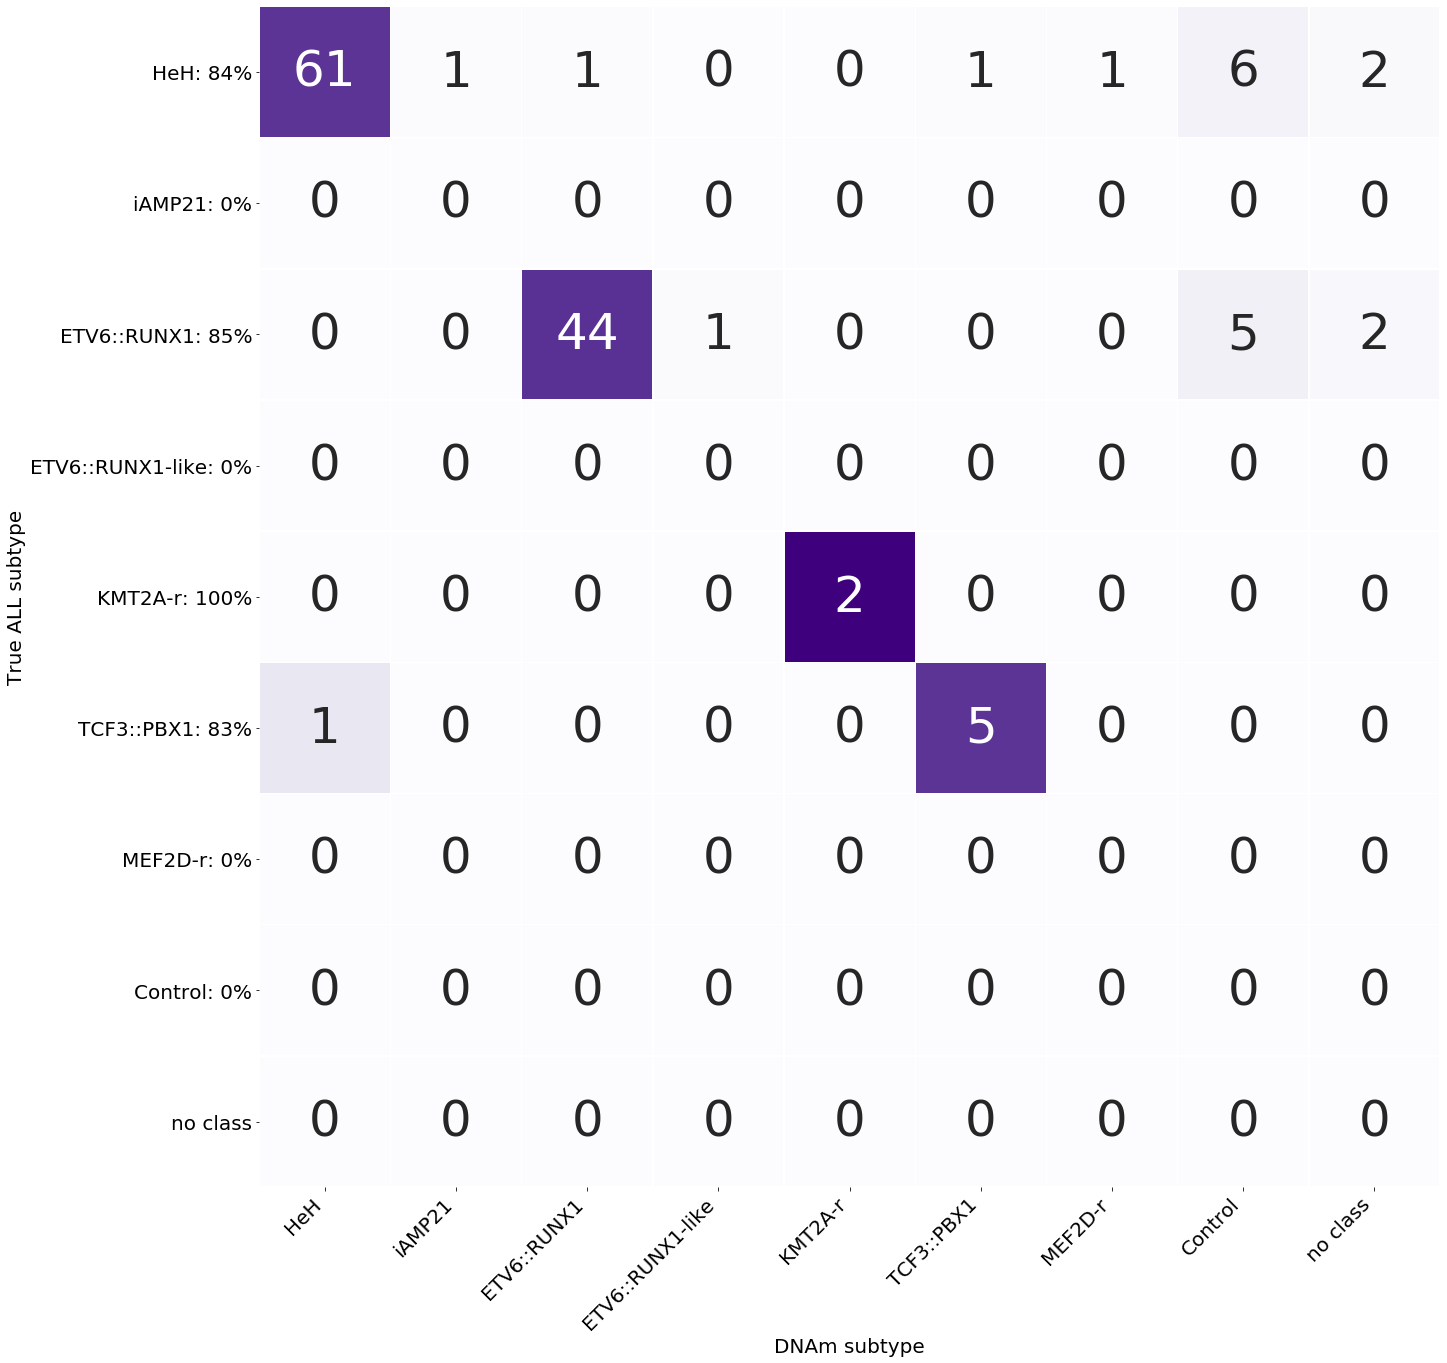

In [45]:
classes = subtypeorder.copy()
classes.append('no_class')
cm = confusion_matrix(testdf.Subtype_updated, testdf.DNAm_subtype_V2, labels = classes)
cm_norm = confusion_matrix(testdf.Subtype_updated, testdf.DNAm_subtype_V2, labels = classes, normalize = 'true')
labels = newnames
labels.append('no class')
hor, ver = cm.shape
xticks = [float(h)+0.5 for h in list(range(hor))]
yticks = [float(v)+0.5 for v in list(range(ver))]
plt.figure(figsize = (20,20))
sns.heatmap(cm_norm, annot=cm, linewidths=.5, square = True, cmap = 'Purples',  annot_kws = {'fontsize' : 50}, fmt = 'g', cbar = False)
plt.ylabel('True ALL subtype', fontsize = 20)
plt.xlabel('DNAm subtype', fontsize = 20)
plt.xticks(xticks, labels[:hor], rotation = 45, fontsize = 20, ha='right')
plt.yticks(yticks, ylabels, rotation = 0, fontsize = 20)
plt.tight_layout()

plt.show()